In [1]:
import numpy as np
import pandas as pd

# Análise - Video Game Sales with Ratings
#### Este conjunto de dados é a união das vendas de jogos de video game do Vgchartz com as notas correspondentes no Metacritic:
https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

https://www.vgchartz.com/

https://www.metacritic.com/browse/games/release-date/available

## Importação dos dados

In [2]:
df_games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Explorando os dados

In [3]:
# Linhas x Colunas
df_games.shape

(16719, 16)

In [4]:
# Nome das colunas
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
# Informações do DataFrame
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
# Quantidade de cada valor da coluna User_Score
df_games.User_Score.value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
       ... 
2.5      12
2.4      11
2        11
9.4      11
2.9       9
1.7       9
2.1       9
2.7       8
1.8       6
2.2       6
9.5       6
1.4       5
2.6       4
1.2       3
1.6       3
0.2       2
1.3       2
1.9       2
2.3       2
1         2
9.6       2
0.7       2
1.5       2
0.6       2
0.3       2
0.9       2
1.1       2
0.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [7]:
# Substituindo valores da coluna User_Score com TBD por -1
df_games['User_Score'] = df_games['User_Score'].replace(regex='tbd', value=-1)

In [8]:
# Trocando o tipo da coluna User_Score para numérico
df_games['User_Score'] = pd.to_numeric(df_games['User_Score'])

In [9]:
# Informações estatísticas das colunas 
df_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,5.157673,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,3.717634,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,2.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,6.900000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


#### Quantidade de jogos por plataforma

In [10]:
pd.DataFrame(df_games.Platform.value_counts().sort_values(ascending=False))

,Platform
PS2,2161
DS,2152
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824
GBA,822


Claro que este números não representam a quantidade de jogos lançados para estas plataformas, mas apenas aqueles presentes neste conjunto de dados e provavelmente os presentes nos site utilizado na extração.

## Vendas

#### Vendas (em milhões de unidades) por plataforma

In [11]:
pd.DataFrame(df_games.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False))

,Global_Sales
Platform,
PS2,1255.64
X360,971.63
PS3,939.43
Wii,908.13
DS,807.10
PS,730.68
GBA,318.50
PS4,314.23
PSP,294.30


Como foi percebido acima e detalhado abaixo, vemos que a quantidade de jogos em determinada plataforma não reflete necessariamente um maior volume de vendas, pois o X360 e o DS invertem suas posições:

In [12]:
print(pd.DataFrame(df_games.Platform.value_counts().sort_values(ascending=False)).head(5))
print()
print(pd.DataFrame(df_games.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False)).head(5))

      Platform
PS2       2161
DS        2152
PS3       1331
Wii       1320
X360      1262

          Global_Sales
Platform              
PS2            1255.64
X360            971.63
PS3             939.43
Wii             908.13
DS              807.10


#### Vendas (em milhões de unidades) por Gênero

In [13]:
dfGenres = pd.DataFrame(df_games.groupby('Genre').sum()['Global_Sales'].sort_values(ascending=False))
dfGenres

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94
Role-Playing,934.40
Platform,828.08
Misc,803.18
Racing,728.90
Fighting,447.48
Simulation,390.42


In [14]:
dfGenres.plot.barh(color="#4571c4").invert_yaxis();

A relação acima faz sentido com os jogos que vemos como os mais populares nos últimos anos.

#### Top20 editoras (Publisher) em vendas (em milhões de unidades) 

In [15]:
pd.DataFrame(df_games.groupby('Publisher').sum()['Global_Sales'].sort_values(ascending=False).head(20))

,Global_Sales
Publisher,
Nintendo,1788.81
Electronic Arts,1116.96
Activision,731.16
Sony Computer Entertainment,606.48
Ubisoft,471.61
Take-Two Interactive,403.82
THQ,338.44
Konami Digital Entertainment,282.39
Sega,270.35


O resultado não é surpreendente, pois a Nintendo corre uma corrida só dela e no tempo dela, onde o seu público é sempre fiel aos novos lançamentos de franquias já consagradas ou novos consoles.
Consoles estes, que geralmente têm o seu lançamento a cada 5 ou 7 anos:

https://en.wikipedia.org/wiki/Nintendo_video_game_consoles

#### Top20 desenvolvedores(as) em vendas (em milhões de unidades) 

In [16]:
pd.DataFrame(df_games.groupby('Developer').sum()['Global_Sales'].sort_values(ascending=False).head(20))

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


#### Vendas (em milhões de unidades) por Ano

In [17]:
pd.DataFrame(df_games.groupby('Year_of_Release').sum()['Global_Sales'].sort_values(ascending=False))

,Global_Sales
Year_of_Release,
2008.0,671.79
2009.0,658.88
2007.0,605.37
2010.0,590.59
2006.0,518.22
2011.0,507.79
2005.0,458.31
2004.0,419.05
2002.0,395.51


Salvo algumas pequenas exceções, em geral as vendas por ano refletem a quantidade de jogos lançados em cada um destes mesmos anos:

In [18]:
print(pd.DataFrame(df_games.groupby('Year_of_Release').sum()['Global_Sales'].sort_values(ascending=False)).head(10))
print()
print(pd.DataFrame(df_games.groupby('Year_of_Release').count()['Name'].sort_values(ascending=False)).head(10))

                 Global_Sales
Year_of_Release              
2008.0                 671.79
2009.0                 658.88
2007.0                 605.37
2010.0                 590.59
2006.0                 518.22
2011.0                 507.79
2005.0                 458.31
2004.0                 419.05
2002.0                 395.51
2013.0                 361.24

                 Name
Year_of_Release      
2008.0           1427
2009.0           1426
2010.0           1255
2007.0           1197
2011.0           1136
2006.0           1006
2005.0            939
2002.0            829
2003.0            775
2004.0            762


#### Top 20 Jogos mais vendidos de todos os tempos

In [19]:
dfTop20 = pd.DataFrame(df_games.groupby(['Name','Platform','Year_of_Release','Publisher', 'Developer']).sum()['Global_Sales'].sort_values(ascending=False))
dfTop20 = dfTop20.reset_index()
dfTop20.index = dfTop20.index + 1
dfTop20.head(20)

,Name,Platform,Year_of_Release,Publisher,Developer,Global_Sales
1,Wii Sports,Wii,2006.0,Nintendo,Nintendo,82.53
2,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo,35.52
3,Wii Sports Resort,Wii,2009.0,Nintendo,Nintendo,32.77
4,New Super Mario Bros.,DS,2006.0,Nintendo,Nintendo,29.80
5,Wii Play,Wii,2006.0,Nintendo,Nintendo,28.92
6,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,Nintendo,28.32
7,Mario Kart DS,DS,2005.0,Nintendo,Nintendo,23.21
8,Wii Fit,Wii,2007.0,Nintendo,Nintendo,22.70
9,Kinect Adventures!,X360,2010.0,Microsoft Game Studios,Good Science Studio,21.81
10,Wii Fit Plus,Wii,2009.0,Nintendo,Nintendo,21.79


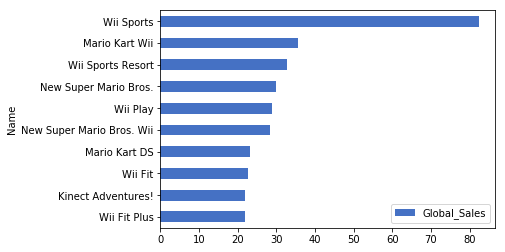

In [20]:
#Top10 para visualização gráfica
dfPlot = dfTop20.head(10)
dfPlot.plot.barh(x='Name', y='Global_Sales', color="#4571c4").invert_yaxis();

Aqui confirmamos aquilo que vimos em "Vendas (em milhões de unidades) por editora (Publisher)", pois a Nintendo domina não somente o top 20, como também as primeiras 14 posições.

Abaixo geramos o Top10 de vendas por região, para entendermos a fatia de cada uma delas em cada jogo do Top20:

In [21]:
# Vendas no Japão
dfTop10 = pd.DataFrame(df_games.groupby(['Name','Platform','Year_of_Release','Publisher', 'Developer']).sum()['JP_Sales'].sort_values(ascending=False))
dfTop10 = dfTop10.reset_index()
dfTop10.index = dfTop10.index + 1
dfTop10.head(10)

,Name,Platform,Year_of_Release,Publisher,Developer,JP_Sales
1,New Super Mario Bros.,DS,2006.0,Nintendo,Nintendo,6.50
2,Animal Crossing: Wild World,DS,2005.0,Nintendo,Nintendo,5.33
3,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Nintendo,Nintendo,5.32
4,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,Nintendo,4.70
5,Animal Crossing: New Leaf,3DS,2012.0,Nintendo,Nintendo,4.39
6,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Nintendo,Level 5,4.35
7,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Nintendo,Nintendo,4.16
8,Mario Kart DS,DS,2005.0,Nintendo,Nintendo,4.13
9,Monster Hunter Freedom Unite,PSP,2008.0,Capcom,Capcom,4.13
10,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo,3.79


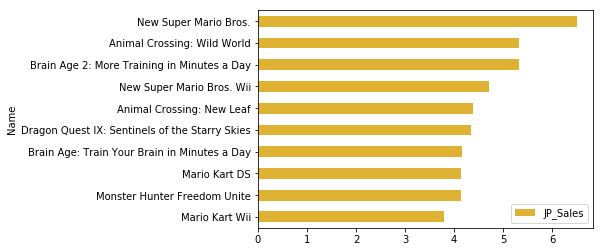

In [22]:
dfPlot = dfTop10.head(10)
dfPlot.plot.barh(x='Name', y='JP_Sales', color="#e0b234").invert_yaxis();

Buscando entender se o domínio da Nintendo nas vendas globais seria devido às vendas no mercado japonês, podemos concluir que não, pois mesmo para os jogos mais vendidos do Japão, quando analisamos globalmente, a fatia japonesa acaba sendo de no máximo 1/3 no caso do "Pokemon Red/Pokemon Blue".

In [23]:
# Vendas na América do Norte
dfTop10 = pd.DataFrame(df_games.groupby(['Name','Platform','Year_of_Release','Publisher', 'Developer']).sum()['NA_Sales'].sort_values(ascending=False))
dfTop10 = dfTop10.reset_index()
dfTop10.index = dfTop10.index + 1
dfTop10.head(10)

,Name,Platform,Year_of_Release,Publisher,Developer,NA_Sales
1,Wii Sports,Wii,2006.0,Nintendo,Nintendo,41.36
2,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo,15.68
3,Wii Sports Resort,Wii,2009.0,Nintendo,Nintendo,15.61
4,Kinect Adventures!,X360,2010.0,Microsoft Game Studios,Good Science Studio,15.00
5,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,Nintendo,14.44
6,Wii Play,Wii,2006.0,Nintendo,Nintendo,13.96
7,New Super Mario Bros.,DS,2006.0,Nintendo,Nintendo,11.28
8,Mario Kart DS,DS,2005.0,Nintendo,Nintendo,9.71
9,Call of Duty: Black Ops,X360,2010.0,Activision,Treyarch,9.70
10,Grand Theft Auto V,X360,2013.0,Take-Two Interactive,Rockstar North,9.66


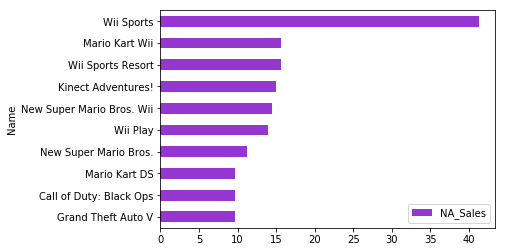

In [24]:
dfPlot = dfTop10.head(10)
dfPlot.plot.barh(x='Name', y='NA_Sales', color="#9436cf").invert_yaxis();

In [25]:
# Vendas na União Europeia
dfTop10 = pd.DataFrame(df_games.groupby(['Name','Platform','Year_of_Release','Publisher', 'Developer']).sum()['EU_Sales'].sort_values(ascending=False))
dfTop10 = dfTop10.reset_index()
dfTop10.index = dfTop10.index + 1
dfTop10.head(10)

,Name,Platform,Year_of_Release,Publisher,Developer,EU_Sales
1,Wii Sports,Wii,2006.0,Nintendo,Nintendo,28.96
2,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo,12.76
3,Wii Sports Resort,Wii,2009.0,Nintendo,Nintendo,10.93
4,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Nintendo,Nintendo,9.20
5,Wii Play,Wii,2006.0,Nintendo,Nintendo,9.18
6,New Super Mario Bros.,DS,2006.0,Nintendo,Nintendo,9.14
7,Grand Theft Auto V,PS3,2013.0,Take-Two Interactive,Rockstar North,9.09
8,Wii Fit Plus,Wii,2009.0,Nintendo,Nintendo,8.49
9,Wii Fit,Wii,2007.0,Nintendo,Nintendo,8.03
10,Mario Kart DS,DS,2005.0,Nintendo,Nintendo,7.47


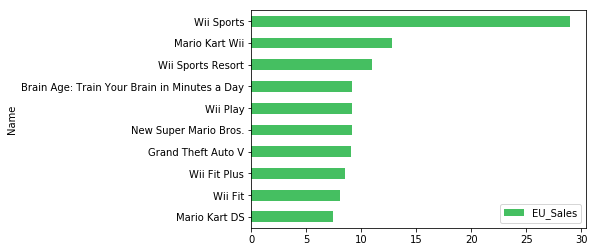

In [26]:
dfPlot = dfTop10.head(10)
dfPlot.plot.barh(x='Name', y='EU_Sales', color="#45bf61").invert_yaxis();

#### Top 3 Jogos mais vendidos por plataforma

In [27]:
for p in df_games.Platform.sort_values().unique():
    print('Plataforma: ', p)
    plat_games = df_games.loc[df_games['Platform'] == p].groupby(['Name','Year_of_Release']).sum()['Global_Sales'].sort_values(ascending=False).head(3)
    print(pd.DataFrame(plat_games))
    print('\n')

Plataforma:  2600
                           Global_Sales
Name      Year_of_Release              
Pac-Man   1982.0                   7.81
Pitfall!  1981.0                   4.50
Asteroids 1980.0                   4.31


Plataforma:  3DO
                                                      Global_Sales
Name                                 Year_of_Release              
Policenauts                          1995.0                   0.06
Sotsugyou II: Neo Generation Special 1995.0                   0.02
Bust-A-Move                          1994.0                   0.02


Plataforma:  3DS
                                                           Global_Sales
Name                                      Year_of_Release              
Pokemon X/Pokemon Y                       2013.0                  14.60
Mario Kart 7                              2011.0                  12.66
Pokemon Omega Ruby/Pokemon Alpha Sapphire 2014.0                  11.68


Plataforma:  DC
                               

Desta visão podemos tirar diversos pontos interessantes:
* No NES e SNES, podemos ver quão relevante acaba sendo um jogo que é vendido junto com o console;
* A consolidação de franquias como GTA e Call of Duty presentes respectivamente em 8 e 7 dos Top3 de diferentes plataformas;
* A febre que o Kinect foi no X360, para ser completamente esquecido no XOne;
* Jogos inovadores que venderam consoles: Wii Sports (Wii) e Kinect Adventures! (X360);
* O fato do PC ter praticamente todos os jogos disponíveis, acaba diluindo as vendas ao ponto que o jogo mais vendido (The Sims 3) não chegar perto dos jogos mais vendidos para os consoles (PS2, X360 e Wii) na época (2009).

## Notas

#### Top20 Jogos com melhores notas da crítica (0 a 100)

In [28]:
dfTop20 = df_games[['Name','Platform','Year_of_Release','Publisher', 'Developer', 'Critic_Score', 'User_Score']]\
                .sort_values(by=['Critic_Score','Name'], ascending=False)
dfTop20 = dfTop20.reset_index()
dfTop20.index = dfTop20.index + 1
dfTop20 = dfTop20.drop(columns=['index'])
dfTop20.head(20)

,Name,Platform,Year_of_Release,Publisher,Developer,Critic_Score,User_Score
1,Tony Hawk's Pro Skater 2,PS,2000.0,Activision,Neversoft Entertainment,98.0,7.7
2,SoulCalibur,DC,1999.0,Namco Bandai Games,Namco,98.0,8.8
3,Grand Theft Auto IV,X360,2008.0,Take-Two Interactive,Rockstar North,98.0,7.9
4,Grand Theft Auto IV,PS3,2008.0,Take-Two Interactive,Rockstar North,98.0,7.5
5,Tony Hawk's Pro Skater 3,PS2,2001.0,Activision,Neversoft Entertainment,97.0,7.5
6,Super Mario Galaxy 2,Wii,2010.0,Nintendo,Nintendo EAD Tokyo,97.0,9.1
7,Super Mario Galaxy,Wii,2007.0,Nintendo,Nintendo,97.0,8.9
8,NFL 2K1,DC,2000.0,Sega,Visual Concepts,97.0,6.0
9,Metroid Prime,GC,2002.0,Nintendo,Retro Studios,97.0,9.3
10,Halo: Combat Evolved,XB,2001.0,Microsoft Game Studios,Bungie Software,97.0,8.6


#### Top20 Jogos com melhores notas dos usuários (0 a 10)

In [29]:
# Desconsiderando notas TBD e jogos com menos de 100 avaliações
dfTop20 = df_games[['Name','Platform','Year_of_Release','Publisher', 'Developer', 'Critic_Score', 'User_Score', 'User_Count']]\
                .query("User_Score >= 0 and User_Count >= 100").sort_values(by=['User_Score','Name'], ascending=False)
dfTop20 = dfTop20.reset_index()
dfTop20.index = dfTop20.index + 1
dfTop20 = dfTop20.drop(columns=['index'])
dfTop20.head(20)

,Name,Platform,Year_of_Release,Publisher,Developer,Critic_Score,User_Score,User_Count
1,Harvest Moon: Friends of Mineral Town,GBA,2003.0,Ubisoft,TOSE,81.0,9.6,116.0
2,Golden Sun: The Lost Age,GBA,2002.0,Nintendo,Camelot Software Planning,86.0,9.5,150.0
3,Cory in the House,DS,2007.0,Disney Interactive Studios,Handheld Games,NaN,9.5,1273.0
4,Shenmue II,DC,2001.0,Sega,Sega AM2,88.0,9.4,201.0
5,Shenmue,DC,1999.0,Sega,Sega AM2,88.0,9.4,201.0
6,Resident Evil 4,GC,2005.0,Capcom,Capcom,96.0,9.4,767.0
7,Paper Mario: The Thousand-Year Door,GC,2004.0,Nintendo,Intelligent Systems,87.0,9.4,306.0
8,Metal Gear Solid,PS,1998.0,Konami Digital Entertainment,KCEJ,94.0,9.4,918.0
9,Castlevania: Symphony of the Night,PS,1997.0,Konami Digital Entertainment,Konami,93.0,9.4,358.0
10,The Witcher 3: Wild Hunt,PC,2015.0,Namco Bandai Games,CD Projekt Red Studio,93.0,9.3,10665.0


Podemos concluir que raramente a avaliação da crítica reflete na avaliação dos usuários e vice-versa. Enquanto a crítica consagra franquias famosas, os usuários amam jogos portáteis, antigos e até improváveis, como o caso do "Cory in the House".

#### Top20 Jogos com piores notas da crítica (0 a 100)

In [30]:
dfTop20 = df_games[['Name','Platform','Year_of_Release','Publisher', 'Developer', 'Critic_Score', 'User_Score']].sort_values(by=['Critic_Score','Name'])
dfTop20 = dfTop20.reset_index()
dfTop20.index = dfTop20.index + 1
dfTop20 = dfTop20.drop(columns=['index'])
dfTop20.head(20)

,Name,Platform,Year_of_Release,Publisher,Developer,Critic_Score,User_Score
1,Ride to Hell,PS3,2013.0,Deep Silver,"Eutechnyx, Deep Silver",13.0,1.0
2,Leisure Suit Larry: Box Office Bust,PS3,2009.0,Codemasters,Team 17,17.0,1.7
3,Anubis II,Wii,2007.0,Metro 3D,Data Design Interactive,19.0,2.7
4,Balls of Fury,Wii,2007.0,Zoo Digital Publishing,Black Lantern Studios,19.0,2.8
5,Chicken Shoot,DS,2007.0,Zoo Digital Publishing,FrontLine Studios,19.0,3.1
6,Nickelodeon Party Blast,XB,2002.0,Infogrames,Data Design Interactive,19.0,4.3
7,Ride to Hell,X360,2013.0,Deep Silver,"Eutechnyx, Deep Silver",19.0,1.3
8,Rugby 15,PS4,2015.0,Bigben Interactive,HB Studios Multimedia,19.0,3.4
9,Deal or No Deal,DS,2007.0,Mindscape,Artefacts Studio,20.0,1.9
10,Ninjabread Man,Wii,2007.0,Popcorn Arcade,Data Design Interactive,20.0,1.7


#### Top20 Jogos com piores notas dos usuários (0 a 10)

In [31]:
# Desconsiderando notas TBD e jogos com menos de 100 avaliações
dfTop20 = df_games[['Name','Platform','Year_of_Release','Publisher', 'Developer', 'Critic_Score', 'User_Score', 'User_Count']]\
                .query("User_Score >= 0 and User_Count >= 100")\
                .sort_values(by=['User_Score','Name'])
dfTop20 = dfTop20.reset_index()
dfTop20.index = dfTop20.index + 1
dfTop20 = dfTop20.drop(columns=['index'])
dfTop20.head(20)

,Name,Platform,Year_of_Release,Publisher,Developer,Critic_Score,User_Score,User_Count
1,Ride to Hell,PS3,2013.0,Deep Silver,"Eutechnyx, Deep Silver",13.0,1.0,218.0
2,MindJack,X360,2011.0,Square Enix,FeelPlus,43.0,1.2,116.0
3,Ride to Hell,X360,2013.0,Deep Silver,"Eutechnyx, Deep Silver",19.0,1.3,433.0
4,Sacred 3,PC,2014.0,Deep Silver,Deep Silver,57.0,1.4,544.0
5,Tony Hawk's Pro Skater 5,PS4,2015.0,Activision,Robomodo,32.0,1.5,427.0
6,Call of Duty: Modern Warfare 3,Wii,2011.0,Activision,"Treyarch, Sledgehammer Games",70.0,1.8,442.0
7,Company of Heroes 2,PC,2013.0,THQ,Relic,80.0,2.1,6157.0
8,Tony Hawk's Pro Skater 5,XOne,2015.0,Activision,Robomodo,39.0,2.1,132.0
9,SimCity,PC,1988.0,Maxis,Maxis,64.0,2.2,4572.0
10,SimCity (2013),PC,2013.0,Electronic Arts,Maxis,64.0,2.2,4572.0


Analisando os piores jogos, podemos ver que:
* Para a crítica são na sua maioria jogos ruins de fato, digamos assim, que inclusive os usuários concordam;
* Já quando olhamos para as análises dos usuários, podemos ver diversos jogos com boas notas da crítica, mas horríveis por parte dos usuários. Isto pode indicar prováveis boicotes de franquias amadas, mas que foram reformuladas para pior, na opinião destes mesmos usuários. Exemplos: 
 * Call of Duty: Modern Warfare 3 (Wii e PC);
 * Company of Heroes 2 (PC);
 * Street Fighter V	(PC).

#### Top 5 Jogos com melhores notas da crítica por plataforma

In [32]:
for p in df_games.Platform.sort_values().unique():
    # Muitas plataformas não possuem avalição da crítica e foram ignoradas na relação
    if (p not in ('2600', '3DO', 'GB', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'SAT', 'SCD', 'SNES', 'TG16', 'WS')):
        print('Plataforma: ', p)
        plat_games = df_games[['Name','Critic_Score']].loc[df_games['Platform'] == p].sort_values(by=['Critic_Score','Name'], ascending=False).head(5)
        plat_games = plat_games.reset_index()
        plat_games.index = plat_games.index + 1
        plat_games = plat_games.drop(columns=['index'])
        print(pd.DataFrame(plat_games))
        print('\n')

Plataforma:  3DS
                                         Name  Critic_Score
1                      Fire Emblem: Awakening          92.0
2  The Legend of Zelda: A Link Between Worlds          91.0
3                         Super Mario 3D Land          90.0
4                               Shovel Knight          90.0
5       The Legend of Zelda: Majora's Mask 3D          89.0


Plataforma:  DC
                Name  Critic_Score
1        SoulCalibur          98.0
2            NFL 2K1          97.0
3   Skies of Arcadia          93.0
4         Grandia II          90.0
5  Sonic Adventure 2          89.0


Plataforma:  DS
                                     Name  Critic_Score
1        Grand Theft Auto: Chinatown Wars          93.0
2                          Chrono Trigger          92.0
3                           Mario Kart DS          91.0
4  The Legend of Zelda: Phantom Hourglass          90.0
5               Advance Wars: Dual Strike          90.0


Plataforma:  GBA
                      

#### Top 5 Jogos com melhores notas dos usuários por plataforma

In [33]:
for p in df_games.Platform.sort_values().unique():
    # Muitas plataformas não possuem avalição dos usuários e foram ignoradas na relação
    if (p not in ('2600', '3DO', 'GB', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'SAT', 'SCD', 'SNES', 'TG16', 'WS')):
        print('Plataforma: ', p)
        plat_games = df_games[['Name','User_Score', 'User_Count']]\
                        .query("User_Score >= 0 and User_Count >= 100")\
                        .loc[df_games['Platform'] == p]\
                        .sort_values(by=['User_Score','Name'], ascending=False).head(5)
        plat_games = plat_games.reset_index()
        plat_games.index = plat_games.index + 1
        plat_games = plat_games.drop(columns=['index'])
        print(pd.DataFrame(plat_games))
        print('\n')

Plataforma:  3DS
                                         Name  User_Score  User_Count
1                      Fire Emblem: Awakening         9.1      1130.0
2       The Legend of Zelda: Majora's Mask 3D         9.0       478.0
3  The Legend of Zelda: A Link Between Worlds         8.9      1057.0
4           Zero Escape: Virtue's Last Reward         8.8       188.0
5               Pokemon Super Mystery Dungeon         8.8       190.0


Plataforma:  DC
                Name  User_Score  User_Count
1         Shenmue II         9.4       201.0
2            Shenmue         9.4       201.0
3        SoulCalibur         8.8       200.0
4  Sonic Adventure 2         8.6       236.0


Plataforma:  DS
                                        Name  User_Score  User_Count
1                          Cory in the House         9.5      1273.0
2    Professor Layton and the Unwound Future         9.2       111.0
3               Phoenix Wright: Ace Attorney         9.2       203.0
4  Pokemon Mystery Dungeon

## K-Means
Algoritmo para clusterização/agrupamento de dados que utiliza aprendizado não supervisionado.

In [47]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [35]:
# Criando novo DataFrame somente com as colunas que serão usadas
df_k = pd.DataFrame(df_games[['Critic_Score','User_Score']])
df_k.head()

,Critic_Score,User_Score
0,76.0,8.0
1,NaN,NaN
2,82.0,8.3
3,80.0,8.0
4,NaN,NaN


In [36]:
# Exclui as linhas com User_Score igual a -1, setado no início da análise
df_k = df_k.drop(df_k[df_k.User_Score == -1].index)
# Exibe o percentual de linhas restantes
print(round(df_k.shape[0]/df_games.shape[0]*100, 2))

85.5


In [37]:
# Exclui os jogos sem avaliações da crítica e/ou usuários
df_k = df_k.dropna()
print(round(df_k.shape[0]/df_games.shape[0]*100, 2))

41.97


#### Vetores (User_Score x Critic_Score) ainda sem centróides

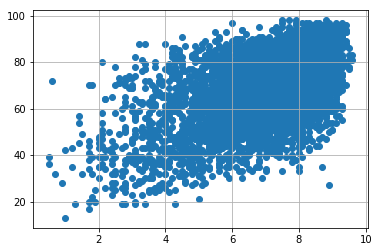

In [48]:
plt.scatter(df_k.User_Score, df_k.Critic_Score)
plt.grid()

#### Agrupamento/clusterização inicial com 3 grupos

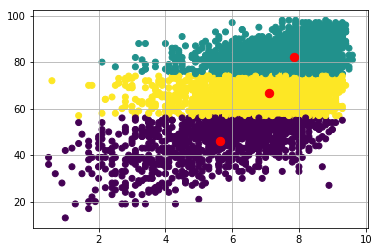

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300)

pred_y = kmeans.fit_predict(df_k)

plt.scatter(df_k.User_Score, df_k.Critic_Score, c = pred_y)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

#### Aplicação do Método Cotovelo 
Do inglês Elbow Method, busca a melhor quantidade de clusters para utilização no K-Means.

O que geralmente acontece ao aumentar a quantidade de clusters é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando.


Fonte: https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

In [40]:
from math import sqrt
# Fórmulas:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [41]:
sum_of_squares = calculate_wcss(df_k)
n_ideal = optimal_number_of_clusters(sum_of_squares)
print('Quantidade ideal de clusters: ', n_ideal)

Quantidade ideal de clusters:  6


#### Agrupamento/clusterização ideal

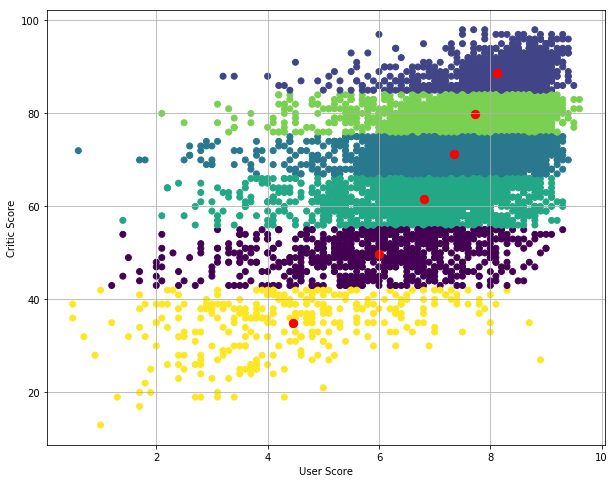

In [61]:
kmeans = KMeans(n_clusters = n_ideal, init = 'k-means++', n_init = 10, max_iter = 300)

pred_y = kmeans.fit_predict(df_k)

plt.figure(figsize=(10,8))
plt.scatter(df_k.User_Score, df_k.Critic_Score, c = pred_y)
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

Analisando o gráfico gerado, podemos ver de forma bem distinta os 6 grupos criados, que acabam considerando mais as notas da crítica do que as notas dos usuários.

## Analisando Correlações

In [63]:
df_games.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.063030,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.152283,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.144445,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.138005,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.131837,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.163900,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.443590,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.363371,0.362334
User_Score,-0.063030,0.152283,0.144445,0.138005,0.131837,0.163900,0.443590,0.363371,1.000000,0.027044
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000
